# Regularization in Decision Trees

## Objective

Understand why decision trees overfit
and how hyperparameters control model complexity
through bias–variance tradeoff.

We analyze:

- Deep vs shallow trees
- Structural regularization
- Bias–variance behavior
- Training vs test performance

## Why Trees Overfit

Decision trees recursively split the feature space
until leaves become pure.

Deep trees:

- Create many small regions
- Fit noise in training data
- Have low bias but high variance

Shallow trees:

- Create fewer large regions
- Underfit complex structure
- Have higher bias but lower variance

## Tree Regularization Parameters

Decision tree complexity can be controlled using:

- `max_depth` → Maximum depth of tree
- `min_samples_split` → Minimum samples required to split
- `min_samples_leaf` → Minimum samples required in a leaf
- `max_leaf_nodes` → Limit number of leaves
- `max_features` → Number of features considered per split

These parameters constrain growth
and reduce variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

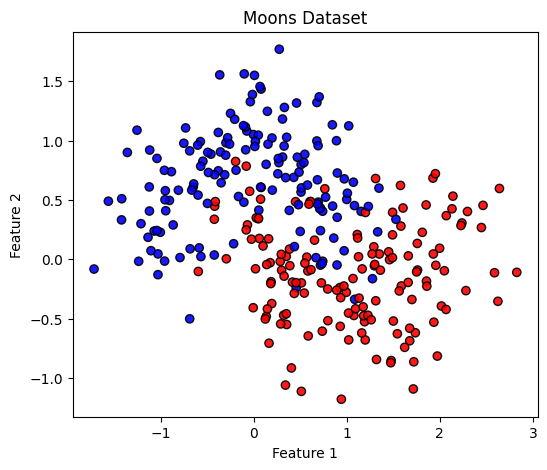

In [7]:
X, y = make_moons(
    n_samples=300, noise=0.3, random_state=42
)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.9, edgecolors='k')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Interpretation

The dataset is nonlinear and noisy.
This makes it ideal to demonstrate
overfitting behavior in deep trees.

# Deep Tree (Unregularized)

In [8]:
tree_deep = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_deep.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

# Regularized Tree

In [9]:
tree_reg = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_reg.fit(X, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [10]:
def plot_decision_boundary(model, X, y, ax=None, title="Decision Boundary", xlabel="Feature 1", y_label="Feature 2"):
    if ax is None:
        fig, ax = plt.subplots()

    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    )

    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid)
    y_pred = y_pred.reshape(x0.shape)

    ax.contourf(x0, x1, y_pred, alpha=0.2, cmap="viridis")
    ax.contour(x0, x1, y_pred, colors='k', linewidths=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="bwr")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    return ax

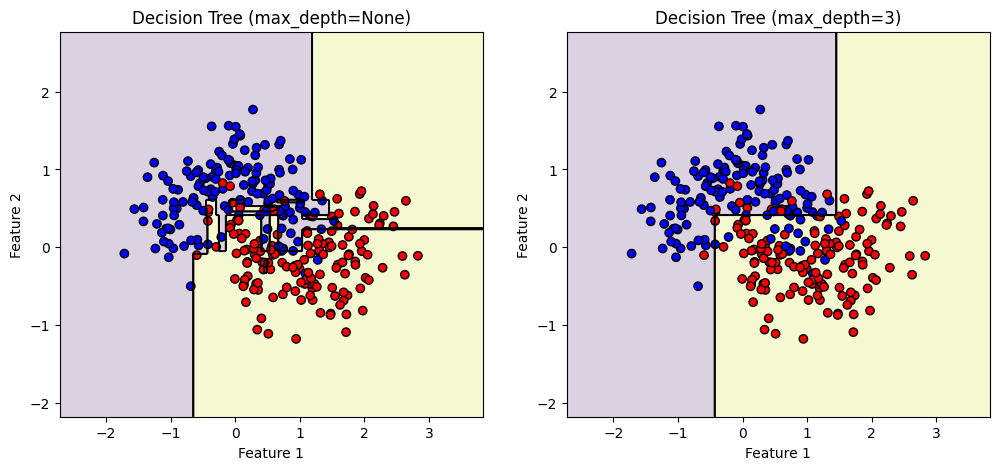

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree_deep, X, y, ax=ax[0], title="Decision Tree (max_depth=None)")
plot_decision_boundary(tree_reg, X, y, ax=ax[1], title="Decision Tree (max_depth=3)")
plt.show()

## Interpretation

Deep Tree:

- Highly jagged boundary
- Fits noise patterns
- High variance

Regularized Tree:

- Smoother boundary
- Ignores minor noise fluctuations
- Better generalization

# Train/Test Accuracy Analysis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

tree_deep.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)

deep_train_acc = accuracy_score(y_train, tree_deep.predict(X_train))
deep_test_acc = accuracy_score(y_test, tree_deep.predict(X_test))

reg_train_acc = accuracy_score(y_train, tree_reg.predict(X_train))
reg_test_acc = accuracy_score(y_test, tree_reg.predict(X_test))

print("Deep Tree - Train Accuracy:", deep_train_acc)
print("Deep Tree - Test Accuracy:", deep_test_acc)

print("Regularized Tree - Train Accuracy:", reg_train_acc)
print("Regularized Tree - Test Accuracy:", reg_test_acc)

Deep Tree - Train Accuracy: 1.0
Deep Tree - Test Accuracy: 0.8555555555555555
Regularized Tree - Train Accuracy: 0.8952380952380953
Regularized Tree - Test Accuracy: 0.9


## Bias–Variance Analysis

Deep Tree:

- Very high training accuracy
- Lower test accuracy
- Overfitting (high variance)

Regularized Tree:

- Slightly lower training accuracy
- Better test accuracy
- Improved generalization

Regularization introduces bias
to significantly reduce variance.

## Bias–Variance Tradeoff in Trees

- Increasing depth → lowers bias, increases variance
- Limiting depth → increases bias, lowers variance

Decision trees are unstable learners.

Ensemble methods (Random Forest)
reduce variance through averaging.
Boosting reduces bias through sequential correction.

## Engineering Takeaways

- Tree depth directly controls complexity.
- Regularization improves generalization.
- Deep trees should rarely be used alone.
- Random Forest stabilizes tree predictions.
- Boosting improves weak tree performance.